# Tutorial Collection

contributors: Sebastián Lepe - Felipe Rojas - 2021
 
Hello and welcome to a tutorial collection of sphviewer. Here we made a notebook summaring our understanding of the tutorials presents on the official page of Sph-Viewer <a> https://alejandrobll.github.io/py-sphviewer/  </a> and the official github repository.

<small> Note: To be able to use this notebook it's important to have the library sph-viewer installed, along with <b> matplotlib </b>, <b> numpy </b>, <b> h5py</b>, and others.

## QuickView

QuickView is the most basic object available on Sph-viewer. Obtainable from <b> sphviwer.tools </b> , it only need the an array of the particles positions to display an image.


On the following example, the file "darkmatter_box.h5py" present on the "test_file" folder it's shown using a simple configuration for QuickView.

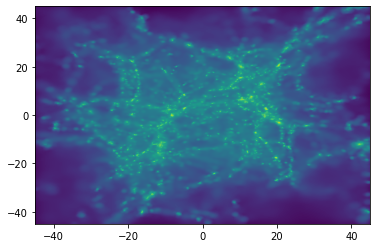

In [3]:
import h5py
from sphviewer.tools import QuickView

with h5py.File('test_file/darkmatter_box.h5py','r') as f:
    pdrk = f['PartType1/Coordinates'][:]

QuickView(pdrk, r=50)

Here you can see one of the different parameters in QuickView, the radios "r". <b> r </b> is the distance of the camera (in  mega-parsec), it can be 'infinity' or any real number.
<br><br>

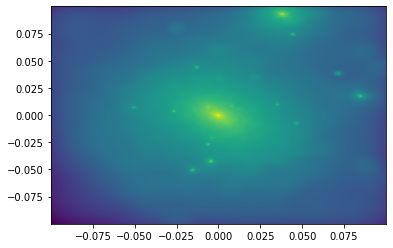

In [8]:
import h5py
from sphviewer.tools import QuickView

halo = h5py.File('test_file/dm_halo.h5py', 'r')
pos  = halo['Coordinates'][:]

qv = QuickView(pos, r='infinity', nb=64)

Another parameter of QuickView is <b>plot </b>. Plot have a preset value of <b> True </b> , if set to <b> False</b> it wont display any image. This is usefull when you want to customize the result. To do this, QuickView comes with the
<b> imshow(*kwargs) </b> function from matplotlib, or you can use matplotlib directly with the functions <b> get_image() </b> that returns the image obteind, along with <b> get_extent() </b> that returns the extent of the image.

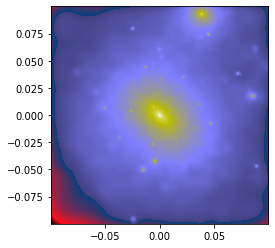

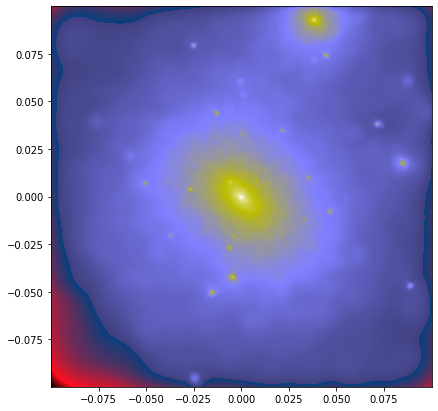

In [29]:
import h5py
from sphviewer.tools import QuickView
import matplotlib.pyplot as plt

with h5py.File('test_file/dm_halo.h5py', 'r') as f:
    pos = f['Coordinates'][:]

qv = QuickView(pos, r='infinity', plot=False)

qv.imshow(cmap="gist_stern")
#imshow from QuickView

img = qv.get_image()
extent = qv.get_extent()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(img, extent=extent, cmap="gist_stern", origin='lower')
plt.show()
#imshow from matplotlib

## Diferent Proyections

Exist different tipes of proyections in the proyect, these are <b> parallel </b> and <b> perspective </b> proyection.


The parallel comes when using <b> r ='infinity'</b> because the camera is set on the the infinity so is seeing a parallel plane. 

Perspective projection is when r is set to any real number, thus changing the angular diameter of diferents objects.

In [2]:
import matplotlib.pyplot as plt
import h5py
from sphviewer.tools import QuickView

with h5py.File('test_file/dm_halo.h5py', 'r') as f:
    pos = f['Coordinates'][:]

### Parallel Proyection


Next is an example setting r= 'infinity' and the point where the camera is centered; defined by <b> x,y,z </b>.

We also display the hmsl array, that contains the SPH smoothing length of particles, if is not given then is calculated by QuickView. To get the hsml array, we can use the function <b> get_hsml()</b> of QuickView.

<small> Note: the extent list can be given as a parameter for quickview to set the image size. </small>

[0.02154706 0.01870628 0.01950224 ... 0.00312978 0.00271433 0.0027906 ]


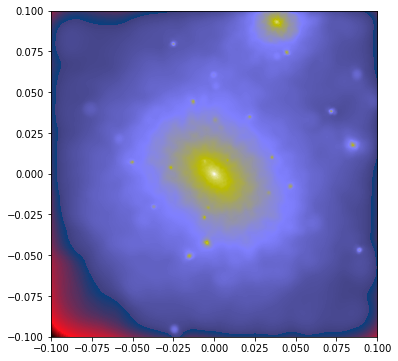

In [5]:
qv_parallel = QuickView(pos, r='infinity', plot=False, x=0, y=0, z=0, extent=[-0.1, 0.1, -0.1, 0.1])

hsml = qv_parallel.get_hsml()
print(hsml)
fig = plt.figure(1, figsize=(6, 6))
plt.imshow(qv_parallel.get_image(), extent=qv_parallel.get_extent(),
    cmap='gist_stern', origin='lower')
plt.show()

now, changing the parameters x,y,z generates a different result. As can be seen in the image that the camera aim to the chosen direction.

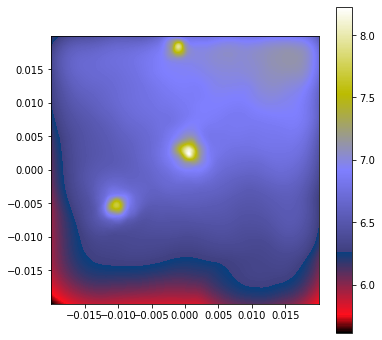

In [6]:
qv_subhalo = QuickView(pos, hsml=hsml, r='infinity', plot=False, 
                       x=-0.005, y=-0.045, z=0, extent=[-0.02, 0.02, -0.02, 0.02])
hsml = qv_parallel.get_hsml()
fig = plt.figure(1, figsize=(6, 6))
plt.imshow(qv_subhalo.get_image(), extent=qv_subhalo.get_extent(),
    cmap='gist_stern', origin='lower')
plt.colorbar()
plt.show()

### Perspective Proyection

The camera is in finite position, therefore there is perspective, as can be seen the parameters r is a real number (in mega parsec) with which generate this shape in the image.

Objects closer to the camera will show greater angular diameter than the objects more far away.

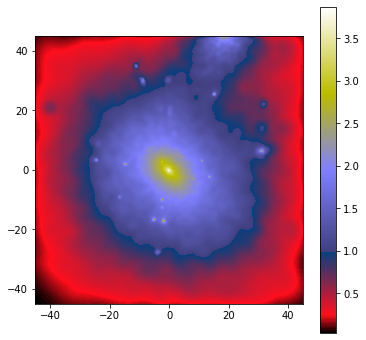

In [7]:
qv_perspective = QuickView(pos, r=0.1, plot=False, x=0, y=-0, z=0, extent=[-0.1, 0.1, -0.1, 0.1])
#camara a 0.1 Mpc distancia

fig = plt.figure(1, figsize=(6, 6))
plt.imshow(qv_perspective.get_image(), extent=qv_perspective.get_extent(),
    cmap='gist_stern', origin='lower')
plt.colorbar()
plt.show()

as can be seen, the limit of image changed to -45,45, because now these represent the angular size of scene.

The default field of vision is in 90º, but it can be changed with the parameters 'zoom'.


In general the distance of the camera, due to the magnification (zoom) and the lineal length of the image, is given by: 
$$ r = l * M / 2 $$
we can see closer to the image by changing r or M, if we changed r, then it will move the camera, while that if we changed M, then it will change the field of view (FoV)

the relation between Fov and M is:
 $$ tan(FoV/2) = 1/M $$
 thus in order of render 0.05 Mpc of object from a distance of 0.1 Mpc, it needed a M=4.


As an example, we changed the 'zoom' parameter to see how the image change.

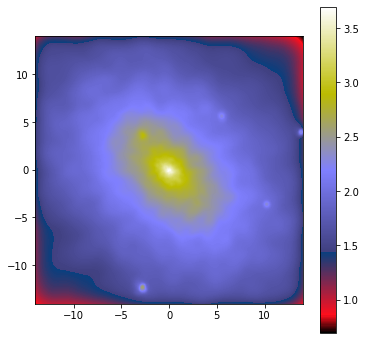

In [8]:
qv_perspective = QuickView(pos, r=0.1, plot=False, x=0, y=-0, z=0, extent=[-0.1, 0.1, -0.1, 0.1], zoom=4)
#camara at 0.1 Mpc distance
fig = plt.figure(1, figsize=(6, 6))
plt.imshow(qv_perspective.get_image(), extent=qv_perspective.get_extent(),
    cmap='gist_stern', origin='lower')
plt.colorbar()
plt.show()

### Side by Side comparation

<div style=display:flex;>
    <img src="media/paralel.gif" width="400" hight="400">
    <img src="media/perpective.gif" width="400" hight="400">
</div>

## Streamlines of N-body simulations

QuickView can be use to obtein streamlins for n-body simulations, the figure below shows the streamlines of the velocity field of a darkmatter simulation.

First we calculate the density field getting an image for the mass, then we obtein the velocity fields for Vx and Vy components. Finally the fields are averaged in density-weight.

To display the streamlines of the velocity field in the image we use the streamline function from matplotlib library. 

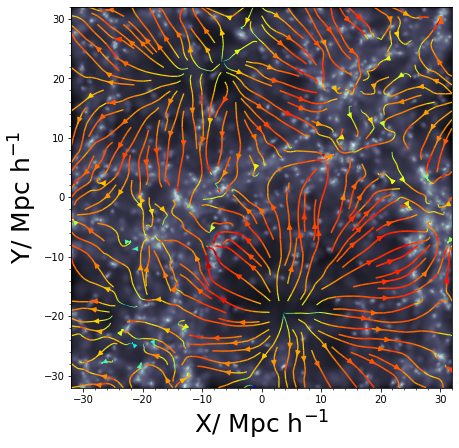

In [9]:
import matplotlib.pyplot as plt
import h5py
from sphviewer.tools import QuickView
import numpy as np

with h5py.File('files/darkmatter_box.h5py') as f:
    pos = f['PartType1/Coordinates'][:]
    vel = f['PartType1/Velocities'][:]
    hsml = f['PartType1/SmoothingLength'][:]

#obteining the density field
qv = QuickView(pos, hsml=hsml, r='infinity', x=32, y=32, z=32,
               plot=False, extent=[-32, 32, -32, 32], logscale=False)
density_field = qv.get_image()
extent = qv.get_extent()

#repeat for x and y components in velocity array

vfield = []
for i in range(2):
    qv = QuickView(pos, vel[:,i], hsml=hsml, r='infinity', x=32, y=32, z=32,
                   plot=False, extent=[-32,32,-32,32], logscale=False)
    vfield.append(qv.get_image() / density_field) #promedia el campo en densidad-peso.

    
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500)

v = np.log10(np.sqrt(vfield[0] ** 2 + vfield[1] ** 2))
color = v / np.max(v)
lw = color * 2
    
fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)

ax.imshow(np.log10(density_field), origin='lower', extent=extent, cmap='bone')
streams = ax.streamplot(X, Y, vfield[0], vfield[1], color=color,
    density=1.5, cmap='jet', linewidth=lw, arrowsize=1)

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm X / \ Mpc \ h^{-1}$', size=25)
ax.set_ylabel(r'$\rm Y / \ Mpc \ h^{-1}$', size=25)
plt.show()

## Smooth Camera

On this section, the tutorial shows how to make a video with two cubes on an empty universe (space created with only the boxes positions).

In [30]:
import matplotlib.pyplot as plt
import h5py
import sphviewer as sph
from sphviewer.tools import camera_tools
import numpy as np

We define a full universe with 2 cubes. 

Positions (pos) must be an array of shape [n,3], with n being the number of particles.

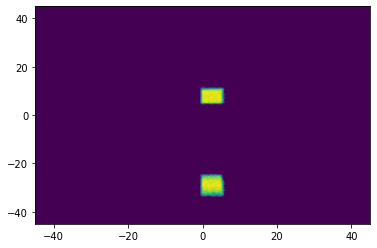

In [35]:
n1 = 10000
cube1 = np.random.rand(n1, 3)
cube1[:,1]-= 6
cube2 = np.random.rand(n1, 3)
cube2[:,1] += 1
cubes = np.concatenate((cube1,cube2), axis=0)
mass = np.ones(n1 + n1)

QuickView(pos=cubes, mass=mass, x=0,y=-0,z=0)

Then we save the particles on the object <b> Particles </b> from sphviewer, and create an scene with this particles with <b> Scene </b> from the same module.

When initializing a scene, it sets automatically the camera, then the previus secuence define the trajectory of the camera. 

In [3]:
P = sph.Particles(cubes, mass)
P.get_pos()

array([[ 0.87052148, -5.66731203,  0.56564554],
       [ 0.7212433 , -5.34329442,  0.75594864],
       [ 0.94028624, -5.69035431,  0.22156177],
       ...,
       [ 0.94872651,  1.3638889 ,  0.73898397],
       [ 0.30340017,  1.34270551,  0.35590852],
       [ 0.97791115,  1.68370648,  0.52672042]])

In this way, the Camera parameters will be updated using the Scene.update_camera() method.

The next part of the tutorial it's about the 'smooth camera'. Function created to have an easy way of changing the
camera parameters and make an scene, we personally have trouble using it and prefer define the camera trayectory by hand.

The 8 anchors that are define in the dictionary anchors contain most of the relevant parameters of the camera 'zoom' , r, and 'extent' already seen, t, p are angles for the camera and others such as id_targets, which defines the index of individual targets, id_frames, which defines the current snapshot od the anchors and finally sim_times, useful for for defining trajectory of the camera in simulations that evolve in time.

Also we have the commands <b>same</b> and <b>pass</b>, 'same' means to set the same value as the previus and pass interpolates between the previus and the next value.

In [6]:
cm_1 = [0.5, 1.5, 0.5] #pos cubo1
cm_2 = [0.5, -5.5, 0.5]#pos cubo2
targets = [cm_1, cm_2]

anchors = {}
anchors['sim_times'] = [0.0, 1.0, 'pass', 3.0, 'same', 'same', 'same'] 
anchors['id_frames'] = np.array([0, 180, 750, 840, 930, 1500, 1680])/4
anchors['r'] = [2,'same','same','same','same','same','same']
anchors['id_targets'] = [0,1, 'same', 'pass', 0, 'same', 1]
anchors['t'] = [0, 'same', 'same', 'same', 'same', 'same', 0]
anchors['p'] = [0, 'same', 'same', 'same', 'same', 'same', 'same'] #angulo
anchors['zoom'] = [1., 'same', 'same', 'same', 'same', 'same', 'same']
anchors['extent'] = [10, 'same', 'same', 'same', 'same', 'same', 30]

data = camera_tools.get_camera_trajectory(targets, anchors)

h = 0
for i in data:
    i['xsize'] = 250
    i['ysize'] = 250
    i['roll'] = 0
    S = sph.Scene(P)
    S.update_camera(**i)
    R = sph.Render(S)
    img = R.get_image()
    R.set_logscale()
    plt.imsave('images/image_'+str('%04d.png'%h), img, vmin=0, vmax=6, cmap='cubehelix')
    h += 1


<div style=display:flex;>
    <img src="media/cubes1.gif" width="300" hight="300">
</div>

a second version of the gif to see the changes that occur.

In [15]:
anchors = {}
anchors['sim_times'] = [0.0, 1.0, 'pass', 3.0, 'same', 'same', 'same'] 
anchors['id_frames'] = np.array([0, 180, 750, 840, 930, 1500, 1680])/4 
anchors['id_targets'] = [0, 1, 'same', 'pass', 0, 'same', 1]
anchors['zoom'] = [1., 'same', 'same', 'same', 'same', 'same', 'same']
anchors['extent'] = [10, 'same', 'same', 'same', 'same', 'same', 30]

anchors['r'] = [10, 2,'same', 4, 2,'same', 10]
anchors['t'] = [0, 'pass', 'pass', '45', 'pass', 'pass', 0]
anchors['p'] = [0, 'pass', 'pass', 'pass', 'pass', 'pass', 30] #angulo

data = camera_tools.get_camera_trajectory(targets, anchors)

h = 0
for i in data:
    i['xsize'] = 250
    i['ysize'] = 250
    i['roll'] = 0
    S = sph.Scene(P)
    S.update_camera(**i)
    R = sph.Render(S)
    img = R.get_image()
    R.set_logscale()
    plt.imsave('images/image_'+str('%04d.png'%h), img, vmin=0, vmax=6, cmap='cubehelix')
    h += 1

<div style=display:flex;>
    <img src="media/cubes2.gif" width="300" hight="300">
</div>

## Combining multiple images


 Py-SPHViewer currently includes only two blending algorithms called “Screen” and “Overlay”. These are included as part of the Blend tools. These blending modes were borrowed from GIMP.

### We take 2 images:

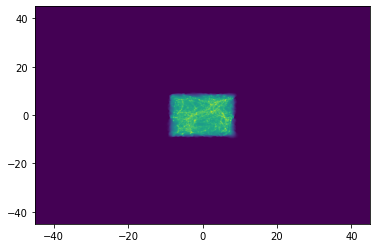

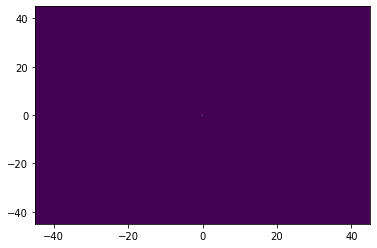

In [3]:
import matplotlib.pyplot as plt
import h5py
from sphviewer.tools import QuickView
import numpy as np

with h5py.File('files/darkmatter_box.h5py','r') as f:
    pdrk = f['PartType1/Coordinates'][:]
    hsml = f['PartType1/SmoothingLength'][:]

with h5py.File('files/dm_halo.h5py', 'r') as f:
    pgas = f['Coordinates'][:]
    
drk = QuickView(pdrk, hsml=hsml, mass=np.ones(len(pdrk)),  r=200)
drk_img = drk.get_image()
    
halo = QuickView(pgas, mass=np.ones(len(pgas)), r=200)
halo_img = halo.get_image()



### Screen blending mode


this blending mode tends to preserve individual colours relatively well. the resulting image is usually brighter. black regions do not change, and white regions become fully white in the resulting image. darker colours in the image appear to be more transparent. the resulting image is independent of the order in which the two images are blended.

In [4]:
def get_normalized_image(image, vmin=None, vmax=None):
    if(vmin == None):
        vmin = np.min(image)
    if(vmax == None):
        vmax = np.max(image)
    image = np.clip(image, vmin, vmax)
    image = (image-vmin)/(vmax-vmin)
    return image

In [5]:
from sphviewer.tools import Blend
import matplotlib as ml

rgb_dm  = ml.cm.Greys_r(get_normalized_image(drk_img, 0, 2.5))
rgb_gas = ml.cm.magma(get_normalized_image(halo_img, 0.3, 1.7))


blend = Blend.Blend(rgb_dm, rgb_gas)
rgb_output = blend.Overlay()
plt.imsave('test.png', rgb_output)



## Structure of sphviewer

1) sphviewer.Particles is the main class which stores the particles information and computes some of their properties that will be used later in order to make the images. 

2) sphviewer.Camera is the class which defines the parameters of the camera, like the point at which the camera is looking at, the distance from the camera to such a point, zoom, number of pixels of its detector, etc.

3) sphviewer.Scene is the class that defines the link between the particles and the camera. In other words, it computes the position and properties of the particles as they are seen from the camera. 

4) sphviewer.Render is the responsible of making the final image. It redenders the set of particles using a SPH kernel-interpolation scheme. It produces the images that can be used after to make a movie.

### Using Py-SPHViewer

Text(0.5, 0, 'eje x')

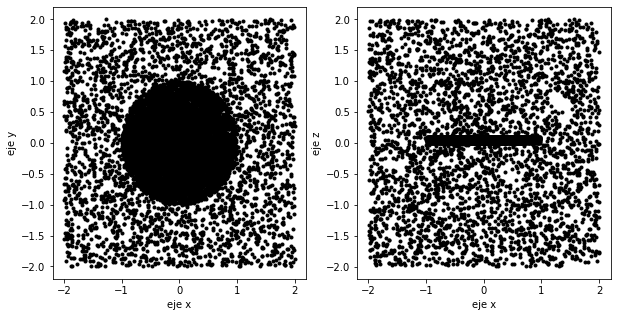

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import sphviewer

n1 = 10000 #number of particles to make the disk
n2 = int(n1/3)  # number of particles to make the background
r  = np.random.rand(n1) 
phi = 2*np.pi*np.random.rand(n1)
pos = np.zeros([n1, 3], dtype=np.float32)
pos[:,0] = r*np.cos(phi) #x
pos[:,1] = r*np.sin(phi) #y
pos[:,2] = 0.1*np.random.rand(n1) #z

background =  -2+4*np.random.rand(n2, 3)
pos = np.concatenate((pos, background),axis=0) #axis 0 concatena en 2do elemento
                                               #pos(10000,3) ,bck (3333,3)
fig = plt.figure(1, figsize=(10,5))
ax1  = fig.add_subplot(121)
ax2  = fig.add_subplot(122)
ax1.plot(pos[:,0], pos[:,1], 'k.')#plot x vs y
ax2.plot(pos[:,0], pos[:,2], 'k.') #plot x vs z
ax1.set_ylabel('eje y')
ax1.set_xlabel('eje x')
ax2.set_ylabel('eje z')
ax2.set_xlabel('eje x')

Before continuing, we have to assume some mass for the particles. I suggest to assume the same mass for all the particles (whith an arbitrary value of 1):


In [399]:
mass = np.ones(n1+n2)

3 steps:

1) Define the Particles we want to render:

In [400]:
Particles = sphviewer.Particles(pos, mass)

2) Set de scene

In [401]:
Scene = sphviewer.Scene(Particles)

3) Render 

In [402]:
Render = sphviewer.Render(Scene)

Text(0, 0.5, 'Y')

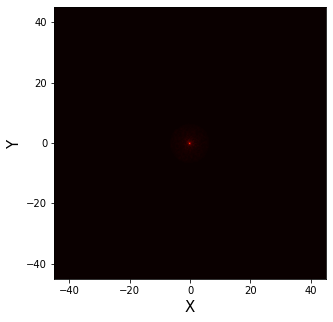

In [403]:
img = Render.get_image()
extent = Render.get_extent()
fig = plt.figure(1,figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.imshow(img, extent=extent, origin='lower', cmap='hot')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

the problem is the dynamical range. The central region in the image is too dense and it spends most of the available colors. In this case, it should be better to use a logarithm scale. Sphviewer have some tools that helps to change the scale on the image:

Text(0, 0.5, 'Y')

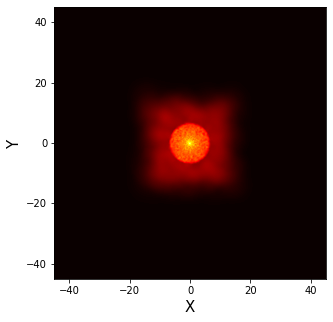

In [404]:
Render.set_logscale()
img = Render.get_image()
extent = Render.get_extent()
fig = plt.figure(1,figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.imshow(img, extent=extent, origin='lower', cmap='hot')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

However, the camera is still to far from the object. The distance from the Camera to the object was choosen automatically by sphviewer. You can define your own camera, or modify the parameters of the existing one. We are going to put the camera closer to the object:

In [389]:
camera = Scene.Camera.get_params()
print (camera['r'])

6.922790951746033


Text(0, 0.5, 'Y')

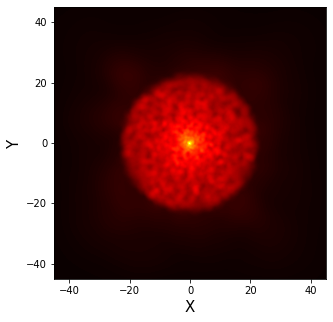

In [407]:
Scene.update_camera(r=2.00)
Render = sphviewer.Render(Scene)
Render.set_logscale()
img = Render.get_image()
extent = Render.get_extent()
fig = plt.figure(1,figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.imshow(img, extent=extent, origin='lower', cmap='hot')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

Note that in the previous image, the limits go from -45 to +45. This is becauase the camera is looking at the particles and the camera is at a specified distance. In such a case, sphviewer returns the coordinates of the image in angular units. By default, the camera has a field of view of 90 degrees when zoom is 1. Increasing the zoom will reduce the field of view. So, it is possible to get nice results by changing the distance and zoom of the camera, just in the same way as you do when taking a photo. On the other hand, when setting r as 'infinity', the camera goes to the infinity and we get a parallel projection, and we can read the coordinates just looking at the axis:

Text(0, 0.5, 'Y')

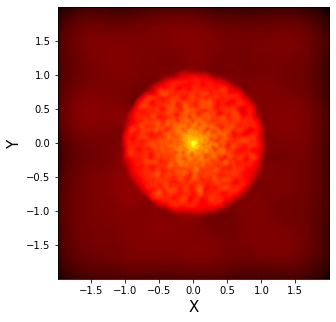

In [413]:
Scene.update_camera(r='infinity')
Render = sphviewer.Render(Scene)
Render.set_logscale()
img = Render.get_image()
extent = Render.get_extent()
fig = plt.figure(1,figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.imshow(img, extent=extent, origin='lower', cmap='hot')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

Text(0, 0.5, 'Y')

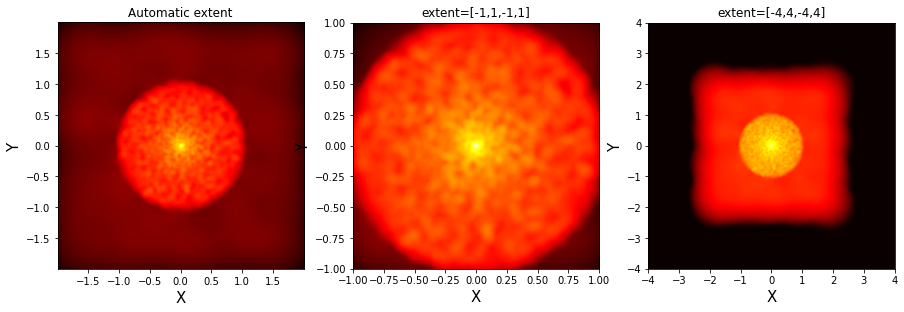

In [414]:

Scene.update_camera(r='infinity')
Render = sphviewer.Render(Scene)
Render.set_logscale()
img1 = Render.get_image()
extent1 = Render.get_extent()

Scene.update_camera(r='infinity', extent=[-1,1,-1,1])
Render = sphviewer.Render(Scene)
Render.set_logscale()
img2 = Render.get_image()
extent2 = Render.get_extent()

Scene.update_camera(r='infinity', extent=[-4,4,-4,4])
Render = sphviewer.Render(Scene)
Render.set_logscale()
img3 = Render.get_image()
extent3 = Render.get_extent()

fig = plt.figure(1,figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(img1, extent=extent1, origin='lower', cmap='hot')
ax1.set_title('Automatic extent')
ax1.set_xlabel('X', size=15)
ax1.set_ylabel('Y', size=15)

ax2.imshow(img2, extent=extent2, origin='lower', cmap='hot')
ax2.set_title('extent=[-1,1,-1,1]')
ax2.set_xlabel('X', size=15)
ax2.set_ylabel('Y', size=15)

ax3.imshow(img3, extent=extent3, origin='lower', cmap='hot')
ax3.set_title('extent=[-4,4,-4,4]')
ax3.set_xlabel('X', size=15)
ax3.set_ylabel('Y', size=15)

Finally, note that you can change the position of the camera respect to the object using spherical angles:

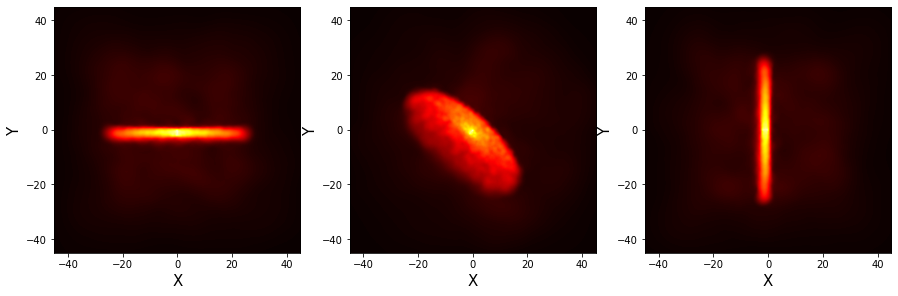

In [422]:
fig = plt.figure(1,figsize=(15,5))
t = [-90,-45, 0] #angulo
p = [0,60,90] #otro angulo
for i in range(len(t)):
    Scene.update_camera(r=2., t=t[i], extent=[-2,2,-2,2], p=p[i])
    Render = sphviewer.Render(Scene)
    Render.set_logscale()
    img = Render.get_image()
    extent = Render.get_extent()
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(img, extent=extent, origin='lower', cmap='hot')
    ax.set_xlabel('X', size=15)
    ax.set_ylabel('Y', size=15)